<a href="https://colab.research.google.com/github/central209/CS4410/blob/main/cbrokaw_16_04_layeradded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 16.4 &mdash; Dense layer added

In [4]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [1]:
import numpy as np

In [5]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

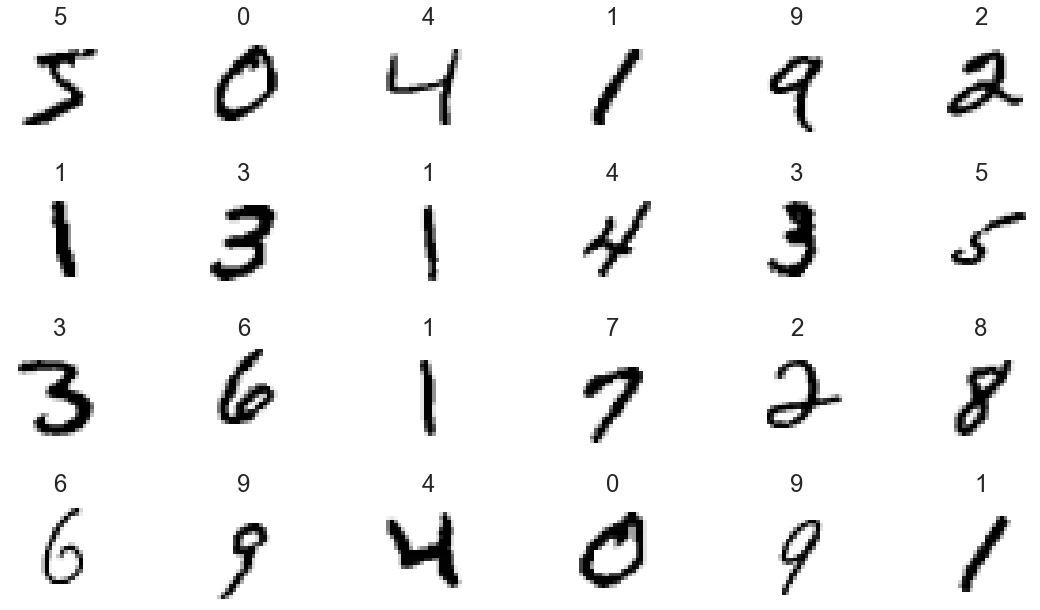

In [ ]:
for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [ ]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train = X_train.astype('float32') / 255

In [ ]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_test = X_test.astype('float32') / 255

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
cnn = Sequential()

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [ ]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(units=4096, activation='relu'))

In [ ]:
cnn.add(Dense(units=128, activation='relu'))

In [ ]:
cnn.add(Dense(units=10, activation='softmax'))

In [ ]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 4096)              13111296  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
__________

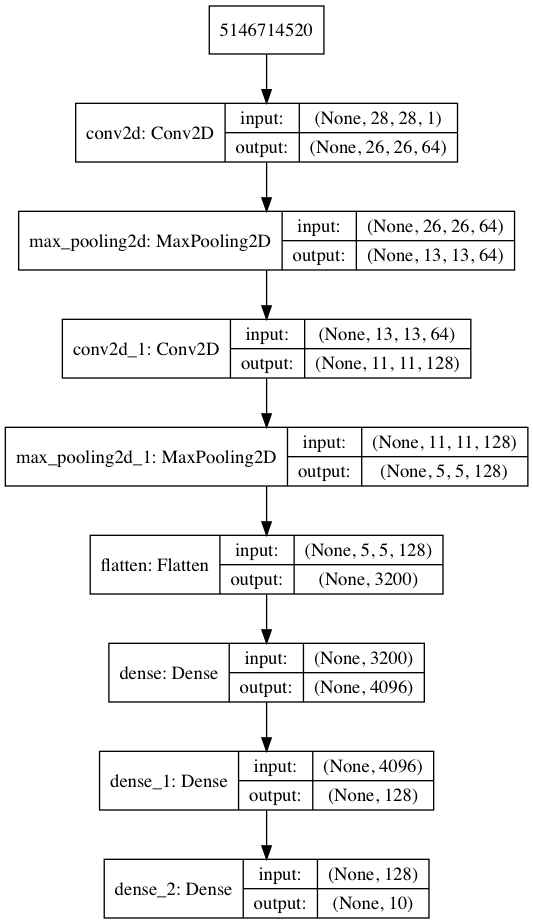

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

In [ ]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
54000/54000 [==============================] - 218s 4ms/sample - loss: 0.1163 - acc: 0.9640 - val_loss: 0.0562 - val_acc: 0.9820
Epoch 2/5
54000/54000 [==============================] - 211s 4ms/sample - loss: 0.0382 - acc: 0.9881 - val_loss: 0.0406 - val_acc: 0.9892
Epoch 3/5
54000/54000 [==============================] - 211s 4ms/sample - loss: 0.0246 - acc: 0.9920 - val_loss: 0.0502 - val_acc: 0.9865
Epoch 4/5
54000/54000 [==============================] - 216s 4ms/sample - loss: 0.0206 - acc: 0.9931 - val_loss: 0.0309 - val_acc: 0.9917
Epoch 5/5
54000/54000 [==============================] - 219s 4ms/sample - loss: 0.0146 - acc: 0.9954 - val_loss: 0.0364 - val_acc: 0.9910


In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 8s 827us/sample - loss: 0.0367 - acc: 0.9898


In [ ]:
loss

0.03668127289485765

In [ ]:
accuracy

0.9898

In [ ]:
predictions = cnn.predict(X_test)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000000%
1: 0.0000001019%
2: 0.0000000027%
3: 0.0000001327%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000000%
9: 0.0000000001%


In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

102

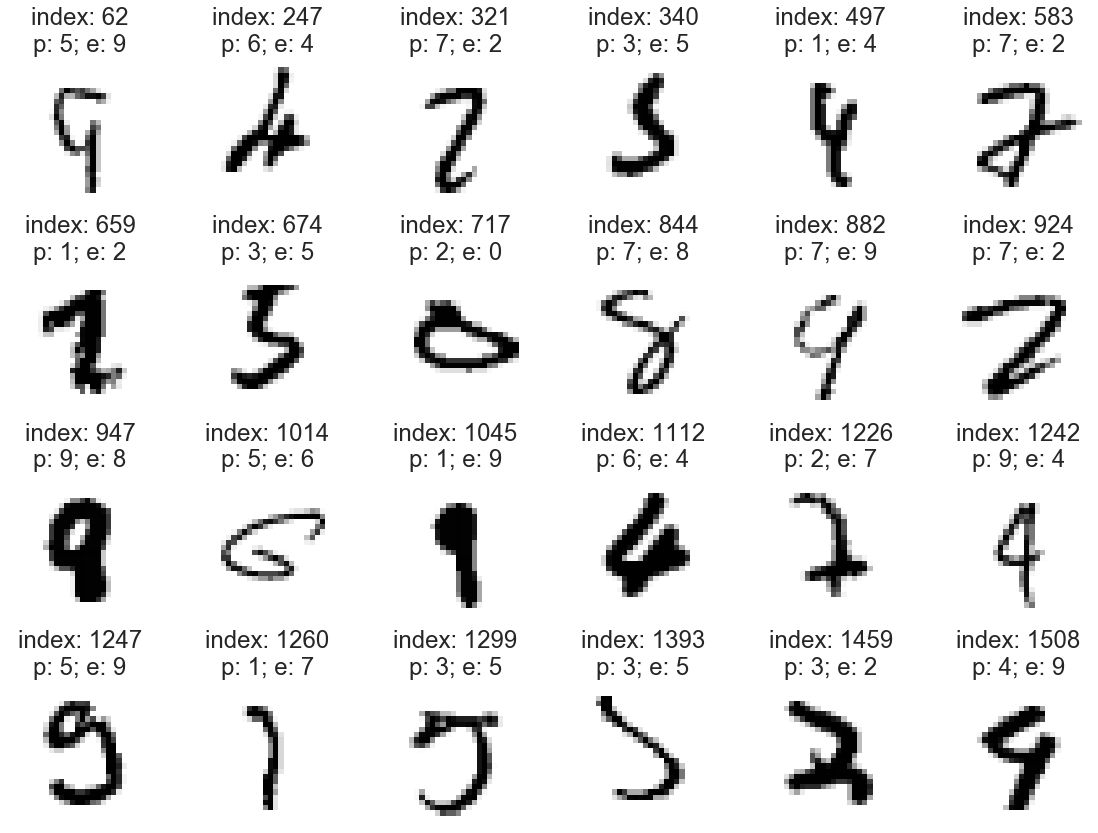

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()